# Predict Amazon Fine Food Reviews Rating

by: Alexander Wu

## Introdution

The [Amazon fine foods reviews dataset](https://www.kaggle.com/snap/amazon-fine-food-reviews) from Kaggle contains 568,454 rows and 10 columns.

In this notebook, I will predict rating score using various models:

* Sentiment analysis models (like Unigram-Bigram word count and TF-IDF model)
* Latent factor models
* Linear regression

Evaluating each of the above models using Mean Squared Error (MSE) on a test set, I found Unigram-Bigram TF-IDF model to perform the best with MSE of 0.7217.

## Importing Data

In [2]:
import numpy as np
import pandas as pd

In [5]:
## Importing CSV file takes ~25 seconds
# data = pd.read_csv("Reviews.csv")
# import pickle
# with open('data.pkl', 'wb') as f:
#     pickle.dump(data, f)
with open('data.pkl','rb') as file:
    data = pickle.load(file)

In [7]:
df = data.sample(frac=1, random_state=258).reset_index(drop=True)
df["Summary"].fillna("", inplace=True)
train, validate, test = np.split(df.sample(frac=1), [int(0.5*len(df)), int(0.75*len(df))])

full = pd.concat([train, validate])
X_train = train['Summary'].values
y_train = train['Score'].values
X_validate = validate['Summary'].values
y_validate = validate['Score'].values
X_test = test['Summary'].values
y_test = test['Score'].values
X_full = full['Summary'].values
y_full = full['Score'].values

## Exploratory Data Analysis (EDA)

In [ ]:
from collections import defaultdict

import matplotlib.pyplot as plt
import seaborn as sns

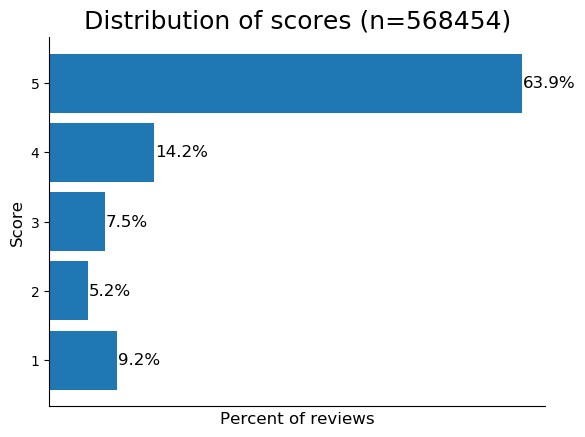

In [27]:
num_reviews = data['Score'].value_counts().sort_index(ascending=False)
score_rating = num_reviews.index
with plt.style.context(('default')):
    plt.barh(score_rating, num_reviews, 0.85)
    for i, v in zip(score_rating, num_reviews):
        v_percent = "{:.1f}%".format(100*v / len(data))
        plt.text(v + 1000, i, v_percent, va='center', fontsize=12)#, fontweight='bold')
    plt.title("Distribution of scores (n={})".format(len(data)), fontsize=18)
    plt.ylabel("Score", fontsize=12)
    plt.xlabel("Percent of reviews", fontsize=12)
    plt.xticks([])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #plt.gca().spines['bottom'].set_visible(False)
    plt.show()

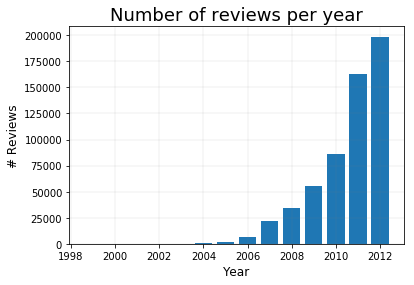

In [28]:
data['Date'] = pd.to_datetime(data['Time'], unit='s')
#data['Date'].dt.dayofweek
year_num_reviews = data['Date'].dt.year.value_counts()
plt.bar(year_num_reviews.index, year_num_reviews)
plt.title("Number of reviews per year", fontsize=18)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# Reviews", fontsize=12)
plt.grid(color='grey', linewidth=0.25, alpha=0.5)
plt.show()

In [29]:
data['DayOfWeek'] = data['Date'].dt.dayofweek
dayofweek = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
dayofweek_df = data.groupby('DayOfWeek')[['Score']].agg(np.mean).reset_index()
dayofweek_df['DayOfWeek'] = dayofweek_df['DayOfWeek'].apply(lambda x: dayofweek[x])

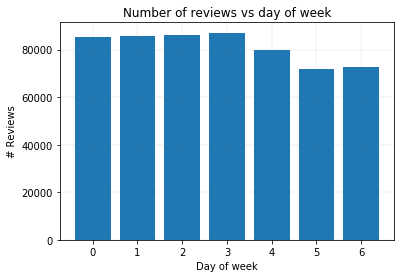

In [30]:
dayofweek_num_reviews = data['Date'].dt.dayofweek.value_counts()
plt.bar(dayofweek_num_reviews.index, dayofweek_num_reviews)
plt.title("Number of reviews vs day of week")
plt.xlabel("Day of week")
plt.ylabel("# Reviews")
plt.grid(color='grey', linewidth=0.25, alpha=0.5)
plt.show()

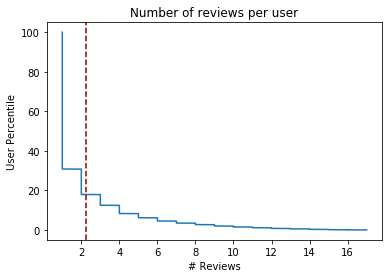

,Min,Median,Mean,Max
0,1,1.0,2.220012,448


In [152]:
#plt.plot(range(len(user_counts99)), user_counts99)
plt.plot(user_counts99, np.linspace(100, 0, len(user_counts99)))
plt.axvline(np.mean(user_counts), linestyle='--', c='darkred')
plt.title("Number of reviews per user")
plt.ylabel("User Percentile")
plt.xlabel("# Reviews")
plt.show()
pd.DataFrame({
    "Min": [min(user_counts)],
    "Median": [np.median(user_counts)],
    "Mean": [np.mean(user_counts)],
    "Max": [max(user_counts)],
})

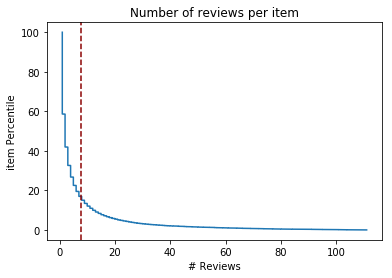

,Min,Median,Mean,Max
0,1,2.0,7.655121,913


In [154]:
#plt.plot(range(len(item_counts99)), item_counts99)
plt.plot(item_counts99, np.linspace(100, 0, len(item_counts99)))
plt.axvline(np.mean(item_counts), linestyle='--', c='darkred')
plt.title("Number of reviews per item")
plt.ylabel("item Percentile")
plt.xlabel("# Reviews")
plt.show()

pd.DataFrame({
    "Min": [min(item_counts)],
    "Median": [np.median(item_counts)],
    "Mean": [np.mean(item_counts)],
    "Max": [max(item_counts)],
})

In [71]:
np.mean(user_counts), np.std(user_counts)

(2.2200117941568154, 4.443352019938383)

In [72]:
np.mean(item_counts), np.std(item_counts)

(2.2200117941568154, 4.443352019938383)

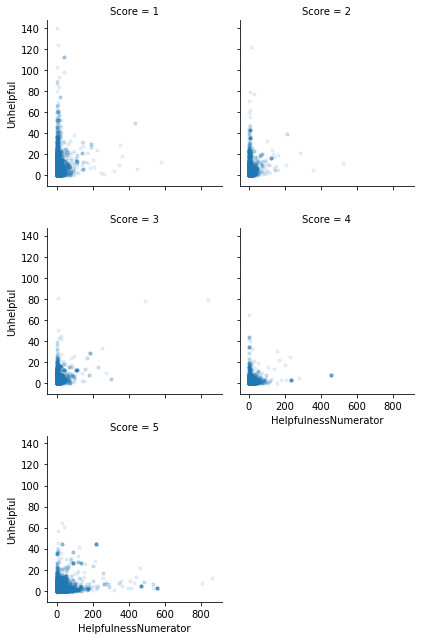

In [32]:
data['Unhelpful'] = data['HelpfulnessDenominator'] - data['HelpfulnessNumerator']
g = sns.FacetGrid(data, col="Score", col_wrap=2)
g.map(plt.scatter, 'HelpfulnessNumerator', 'Unhelpful', marker='.', alpha=0.1)
plt.show()

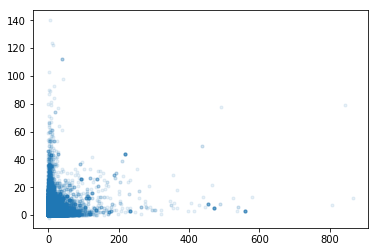

In [57]:
x = data['HelpfulnessNumerator'].values
#y = data['HelpfulnessDenominator'].values
y = data['Unhelpful'] 
plt.scatter(x, y, marker='.')
plt.show()

In [11]:
np.mean(data['Score'])

4.183198640523243

In [14]:
mean_squared_error(np.repeat(5,len(y_test)), y_test)

2.379350380680299

**2.** Identify a **predictive task** that can be studied on this dataset. Describe how you will evaluate your
model at this predictive task, what relevant baselines can be used for comparison, and how you will assess
the validity of your model’s predictions. It’s fine to use models that were described in class here (i.e.,
you don’t have to invent anything new (though you may!)), though you should explain and justify which
model was appropriate for the task. It’s also important in this section to carefully describe what features
you will use and how you had to process the data to obtain them.

In [110]:
y_pred = np.repeat(train['Score'].mean(), len(validate))
y_validate = validate['Score'].values

In [113]:
mean_squared_error(y_pred, y_validate)

1.7089743027491315

In [116]:
y_test_pred = np.repeat(train['Score'].mean(), len(test))
y_test = test['Score'].values
mean_squared_error(y_test_pred, y_test)

1.726092781848103

## Text Analysis

In [26]:
import string

import nltk
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [123]:
train_sample = train[:5000]

In [9]:
from nltk import word_tokenize

In [214]:
data["Summary"].fillna("", inplace=True)

In [215]:
summ_lengths = data['Summary'].apply(lambda x: len(word_tokenize(x))).values

In [216]:
summ_lengths99 = sorted(summ_lengths)[:int(0.99*len(summ_lengths))]

In [196]:
text_lengths = train['Text'].apply(lambda x: len(word_tokenize(x))).values

In [225]:
av_summ_wc = np.mean(summ_lengths)

In [249]:
sorted(summ_lengths)[-10:]

[49, 51, 59, 60, 62, 70, 74, 74, 74, 81]

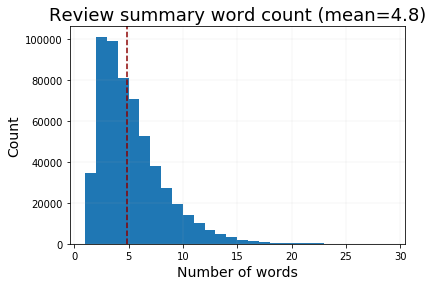

In [266]:
plt.hist(summ_lengths, bins=range(1,30))
plt.title("Review summary word count (mean={:.1f})".format(av_summ_wc), fontsize=18)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Number of words", fontsize=14)
plt.axvline(av_summ_wc, linestyle='--', c='darkred')
plt.grid(linewidth=0.25, alpha=0.5)
plt.show()

In [206]:
text_len99 = sorted(text_lengths) #[:int(0.99*len(text_lengths))]

In [218]:
av_text_wc = np.mean(text_lengths)

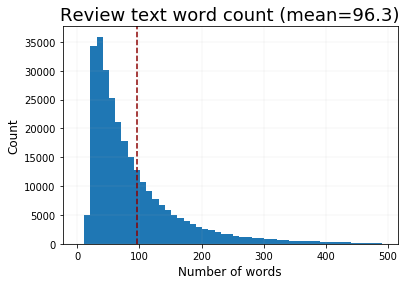

In [267]:
plt.hist(text_len99, bins=range(1,500,10))
plt.title("Review text word count (mean={:.1f})".format(av_text_wc), fontsize=18)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Number of words", fontsize=12)
plt.axvline(av_text_wc, linestyle='--', c='darkred')
plt.grid(linewidth=0.25, alpha=0.5)
plt.show()

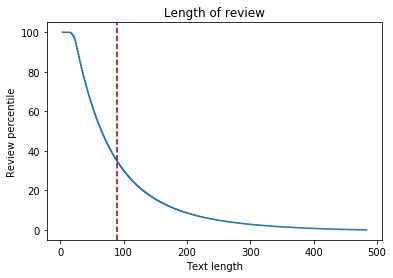

,Min,Median,Mean,Max
0,3,66.0,96.288343,4141


In [208]:
#plt.plot(range(len(text_len99)), text_len99)
plt.plot(text_len99, np.linspace(100, 0, len(text_len99)))
plt.axvline(np.mean(text_len99), linestyle='--', c='darkred')
plt.title("Length of review")
plt.ylabel("Review percentile")
plt.xlabel("Text length")
plt.show()

pd.DataFrame({
    "Min": [min(text_len)],
    "Median": [np.median(text_len)],
    "Mean": [np.mean(text_len)],
    "Max": [max(text_len)],
})

In [10]:
summary_lengths = train['Summary'].apply(lambda x: len(word_tokenize(x))).values
np.mean(summary_lengths)

4.814014854324185

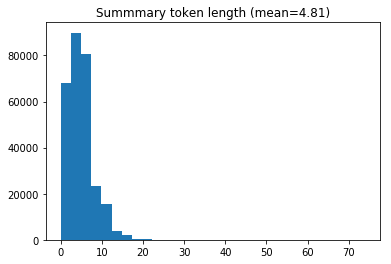

In [12]:
plt.hist(summary_lengths, bins=30)
plt.title("Summmary token length (mean=4.81)")
plt.show()

In [50]:
missing = np.where(pd.isnull(df['Summary']))[0]

In [63]:
type(df)

pandas.core.frame.DataFrame

In [64]:
?df.loc

In [68]:
df['Score'].iloc[missing].value_counts()

2    25
3     2
Name: Score, dtype: int64

In [77]:
unigramCount = defaultdict(int)
bigramCount = defaultdict(int)
punctuation = set(string.punctuation)
for summary in train['Summary']:
    if pd.isnull(summary):
        break
    r = ''.join([c for c in summary.lower() if not c in punctuation])
    tokens = r.split()
    if len(tokens) > 0:
        unigramCount[str(tokens[0])] += 1
    for w1, w2 in zip(tokens[:-1], tokens[1:]):
        bigramCount[(w1,w2)] += 1
        unigramCount[w2] += 1

In [87]:
print("Unique unigrams:", len(unigramCount))
print()
unigram_list = zip(unigramCount.keys(), unigramCount.values())
u_counts = sorted(unigram_list, key=lambda x: x[1], reverse=True)
print("Ten most-frequently-occuring bigrams:")
for unigram, count in u_counts[:10]:
    print("- {:25}{}".format(str(unigram), count))

Unique unigrams: 3486

Ten most-frequently-occuring bigrams:
- great                    536
- the                      442
- good                     402
- a                        359
- for                      340
- and                      274
- best                     260
- not                      233
- my                       230
- love                     212


In [88]:
print("Unique bigrams:", len(bigramCount))
print()
bigram_list = zip(bigramCount.keys(), bigramCount.values())
b_counts = sorted(bigram_list, key=lambda x: x[1], reverse=True)
print("Ten most-frequently-occuring bigrams:")
for bigram, count in b_counts[:10]:
    print("- {:25}{}".format(str(bigram), count))

Unique bigrams: 9379

Ten most-frequently-occuring bigrams:
- ('the', 'best')          108
- ('great', 'product')     44
- ('love', 'this')         42
- ('this', 'is')           41
- ('my', 'favorite')       40
- ('great', 'for')         39
- ('my', 'dog')            36
- ('for', 'a')             34
- ('love', 'it')           34
- ('very', 'good')         33


In [95]:
bigrams = [x[0] for x in b_counts[:1000]]

### Sentiment analysis

bigramId = dict(zip(bigrams, range(len(bigrams))))

def feat_bigram(datum):
    feat = np.zeros(len(bigrams))
    r = ''.join([c for c in datum.lower() if not c in punctuation])
    tokens = r.split()
    for w1, w2 in zip(tokens[:-1], tokens[1:]):
        if (w1, w2) in bigrams:
            feat[bigramId[(w1, w2)]] += 1
    return np.insert(feat, 0, 1) #offset

In [101]:
summaries = train_sample['Summary'].fillna("")

In [103]:
X_bigram = [feat_bigram(d) for d in summaries]
y = test_sample['Score'].values

# With regularization
bigram_clf = linear_model.Ridge(1.0, fit_intercept=False)
bigram_clf.fit(X_bigram, y)
bigram_predictions = bigram_clf.predict(X_bigram)
bigram_mse = mean_squared_error(bigram_predictions, y_)
print("Bigram linear regression (lamda=1) MSE:", bigram_mse)

Bigram linear regression (lamda=1) MSE: 1.1659883868457093


In [106]:
test_sample = test[:5000]

In [107]:
test_sample_summaries = test_sample['Summary'].fillna("")

In [114]:
X_bigram = [feat_bigram(d) for d in summaries]
X_test_bigram = [feat_bigram(d) for d in test_sample_summaries]
y_test = test_sample['Score'].values

# With regularization
bigram_clf = linear_model.Ridge(1.0, fit_intercept=False)
bigram_clf.fit(X_bigram, y)
bigram_predictions = bigram_clf.predict(X_test_bigram)
bigram_mse = mean_squared_error(bigram_predictions, y_test)
print("Bigram linear regression (lamda=1) MSE:", bigram_mse)

Bigram linear regression (lamda=1) MSE: 1.4822070058069472


**3.** Describe your **model**. Explain and justify your decision to use the model you proposed. How will you
optimize it? Did you run into any issues due to scalability, overfitting, etc.? What other models did you
consider for comparison? What were your unsuccessful attempts along the way? What are the strengths
and weaknesses of the different models being compared?

**4.** Describe **literature** related to the problem you are studying. If you are using an existing dataset, where
did it come from and how was it used? What other similar datasets have been studied in the past and
how? What are the state-of-the-art methods currently employed to study this type of data? Are the
conclusions from existing work similar to or different from your own findings?

**5.** Describe your **results** and conclusions. How well does your model perform compared to alternatives,
and what is the significance of the results? Which feature representations worked well and which do not?
What is the interpretation of your model’s parameters? Why did the proposed model succeed why others
failed (or if it failed, why did it fail)?

In [155]:
data[data['Score'] == 1]['Summary']

1                                         Not as Advertised
12                     My Cats Are Not Fans of the New Food
26                                          Nasty No flavor
50                                            Don't like it
62                                           stale product.
73                     Warning!  WARNING!  -ALCOHOL SUGARS!
75                                            No Tea Flavor
99                                                      Bad
153                                           Rip off Price
164                               Tasteless but low calorie
167                                        Very Low quality
168                                        Not Banana Runts
208           These just don't do it for me as breath mints
213                     CHANGED FORMULA MAKES CATS SICK!!!!
216                                 Price cannot be correct
229                                                Not Good
233                                  Fur

In [1]:
import surprise

In [2]:
reader = surprise.Reader()

In [124]:
train_data = surprise.Dataset.load_from_df(train[['UserId', 'ProductId', 'Score']], reader)

In [125]:
train_dataset = train_data.build_full_trainset()
svd = surprise.SVD(n_factors=30)
svd.fit(train_dataset)

In [134]:
y_test_pred = np.empty(len(test))
for i, row in enumerate(test[['UserId','ProductId']].values):
    user, item = row
    y_test_pred[i] = svd.predict(user, item).est

In [139]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_pred, y_test)

1.3381371386003273

In [6]:
?surprise.SVD

In [ ]:
from joblib import dump, load

vect = load("models/vect12.joblib")

In [25]:
X_test_tfidf = vect.transform(X_test)

In [31]:
X_test_tfidf

<5x304536 sparse matrix of type '<class 'numpy.float64'>'
	with 30 stored elements in Compressed Sparse Row format>

In [32]:
?nltk.word_tokenize

In [29]:
vect.get_feature_names()

['~~ but',
 '~~ delicious',
 '~~ the',
 '~~ yum',
 '~~best',
 '~~best ~gluten',
 '~~hardly',
 '~~hardly edible',
 '~~miracle~~',
 '~~miracle~~ when',
 '~~perfect',
 '~~perfect on-the-go',
 '~~quite',
 '~~quite tasty',
 '~~so',
 '~~so disappointing~~',
 '~~surprisingly',
 '~~surprisingly good~~',
 '~~~',
 '~~~ for',
 '~~~chocolate',
 '~~~just',
 '~~~just nice~~~',
 '~~~trio',
 '~~~trio of',
 '~~~~',
 '~~~~ !',
 '~~~~~~~~~',
 '£25',
 '£25 item',
 '£75',
 '£75 !',
 '«',
 '« :',
 '»',
 '» ``',
 '» «',
 '½',
 '½ *',
 '½ pounds']

**Ridge regression with word count**

> $\text{rating} \simeq \alpha + \sum_{w \in \text{text}}\text{count}(w)\cdot\beta_w + \lambda \sum_{w\in\text{text}}\beta_w^2$

**Ridge regression with tf-idf**

> $\text{rating} \simeq \alpha + \sum_{t \in \text{text}}\text{tfidf}(t,D)\cdot\beta_{t}
+ \lambda \sum_{t\in\text{text}}\beta_{t}^2$

> $\text{rating} \simeq \alpha + \sum_{t \in \text{text}, d\in\text{documents}}\text{tfidf}(t,d)\cdot\beta_{t,d} \\
+ \lambda \sum_{t\in\text{text}, d\in\text{documents}}\beta_{t,d}^2$

$$\begin{align}
\text{rating} = &\alpha + \sum_{t \in \text{text}, d\in\text{documents}}\text{tfidf}(t,d)\cdot\beta_{t,d} \\
&+ \lambda \sum_{t\in\text{text}, d\in\text{documents}}\beta_{t,d}^2
\end{align}$$

In [163]:
unigramCount = defaultdict(int)
bigramCount = defaultdict(int)
punctuation = set(string.punctuation)
for summary in data[data['Score'] == 1]['Summary']:
    if pd.isnull(summary):
        break
    r = ''.join([c for c in summary.lower() if not c in punctuation])
    tokens = r.split()
    if len(tokens) > 0:
        unigramCount[str(tokens[0])] += 1
    for w1, w2 in zip(tokens[:-1], tokens[1:]):
        bigramCount[(w1,w2)] += 1
        unigramCount[w2] += 1
print("Unique unigrams:", len(unigramCount))
print()
unigram_list = zip(unigramCount.keys(), unigramCount.values())
u_counts = sorted(unigram_list, key=lambda x: x[1], reverse=True)
print("Ten most-frequently-occuring bigrams:")
for unigram, count in u_counts[:10]:
    print("- {:25}{}".format(str(unigram), count))
print("Unique bigrams:", len(bigramCount))
print()
bigram_list = zip(bigramCount.keys(), bigramCount.values())
b_counts = sorted(bigram_list, key=lambda x: x[1], reverse=True)
print("Ten most-frequently-occuring bigrams:")
for bigram, count in b_counts[:10]:
    print("- {:25}{}".format(str(bigram), count))

Unique unigrams: 11151

Ten most-frequently-occuring bigrams:
- not                      8019
- the                      4679
- this                     3070
- a                        3039
- and                      2821
- is                       2693
- it                       2340
- of                       2321
- in                       2261
- taste                    2194
Unique bigrams: 51877

Ten most-frequently-occuring bigrams:
- ('do', 'not')            802
- ('made', 'in')           576
- ('not', 'good')          515
- ('not', 'buy')           515
- ('in', 'china')          504
- ('this', 'is')           485
- ('tastes', 'like')       475
- ('dont', 'buy')          470
- ('not', 'what')          426
- ('my', 'dog')            419


In [166]:
from nltk import word_tokenize

In [167]:
unigramCount = defaultdict(int)
bigramCount = defaultdict(int)
punctuation = set(string.punctuation)
for summary in data[data['Score'] == 5]['Summary']:
    if pd.isnull(summary):
        break
    # r = ''.join([c for c in summary.lower() if not c in punctuation])
    # tokens = r.split()
    tokens = word_tokenize(summary.lower())
    if len(tokens) > 0:
        unigramCount[str(tokens[0])] += 1
    for w1, w2 in zip(tokens[:-1], tokens[1:]):
        bigramCount[(w1,w2)] += 1
        unigramCount[w2] += 1
print("Unique unigrams:", len(unigramCount))
print()
unigram_list = zip(unigramCount.keys(), unigramCount.values())
u_counts = sorted(unigram_list, key=lambda x: x[1], reverse=True)
print("Ten most-frequently-occuring bigrams:")
for unigram, count in u_counts[:10]:
    print("- {:25}{}".format(str(unigram), count))
print("Unique bigrams:", len(bigramCount))
print()
bigram_list = zip(bigramCount.keys(), bigramCount.values())
b_counts = sorted(bigram_list, key=lambda x: x[1], reverse=True)
print("Ten most-frequently-occuring bigrams:")
for bigram, count in b_counts[:10]:
    print("- {:25}{}".format(str(bigram), count))

Unique unigrams: 31201

Ten most-frequently-occuring bigrams:
- !                        153173
- great                    58397
- the                      35432
- ,                        30893
- best                     30718
- for                      26164
- good                     25819
- love                     23927
- and                      23805
- a                        22528
Unique bigrams: 208428

Ten most-frequently-occuring bigrams:
- ('!', '!')               38447
- ('the', 'best')          12330
- ('love', 'this')         5944
- ('great', 'product')     5876
- ('love', 'it')           5622
- ('it', '!')              5282
- ('delicious', '!')       4803
- ('great', 'for')         4090
- ('my', 'favorite')       3788
- ('love', 'these')        3344


In [177]:
from joblib import load

vect12 = load('models/vect12.joblib')
full_vect = vect12.transform(full)

In [184]:
r1 = vect12.transform(data[data['Score'] == 1]['Summary'])
weights = np.asarray(r1.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': vect12.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

,term,weight
0,!,0.031084
192701,not,0.027401
1,! !,0.017900
23339,?,0.012665
13884,.,0.012195
93654,disappointed,0.011431
143953,horrible,0.010623
264404,terrible,0.010268
266734,the,0.010194
186249,n't,0.010092


In [189]:
data['Summary'].fillna("", inplace=True)

In [190]:
r1 = vect12.transform(data[data['Score'] == 2]['Summary'])
weights = np.asarray(r1.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': vect12.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

,term,weight
192701,not,0.041369
277877,too,0.014854
93654,disappointed,0.014685
13884,.,0.014497
8156,",",0.014073
266734,the,0.013077
15005,...,0.012785
0,!,0.012449
61783,but,0.011457
260754,taste,0.011289


In [191]:
r3 = vect12.transform(data[data['Score'] == 3]['Summary'])
weights = np.asarray(r3.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': vect12.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

,term,weight
192701,not,0.034689
61783,but,0.028641
8156,",",0.023831
128033,good,0.021746
199626,ok,0.018659
8769,", but",0.016326
15005,...,0.015416
13884,.,0.014874
25062,a,0.012992
266734,the,0.012878


In [192]:
r4 = vect12.transform(data[data['Score'] == 4]['Summary'])
weights = np.asarray(r4.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': vect12.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

,term,weight
128033,good,0.042750
0,!,0.022078
131636,great,0.021548
8156,",",0.019520
61783,but,0.016880
25062,a,0.013812
262308,tasty,0.013108
13884,.,0.012402
77320,coffee,0.012041
116110,for,0.011877


In [193]:
r5 = vect12.transform(data[data['Score'] == 5]['Summary'])
weights = np.asarray(r5.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': vect12.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

,term,weight
0,!,0.052481
131636,great,0.033784
89650,delicious,0.018500
1,! !,0.018046
51223,best,0.016471
168725,love,0.015890
128033,good,0.015230
266734,the,0.014162
104585,excellent,0.011976
220723,product,0.011969


In [181]:
weights = np.asarray(full_vect.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': vect12.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

,term,weight
141125,helpful,0.071429
274762,time,0.071429
264942,text,0.071429
146631,id,0.071429
237217,score,0.071429
87407,date,0.071429
256638,summary,0.071429
203023,or apples,0.000000
203022,or apple,0.000000
203021,or appetizers,0.000000


$$\text{rating} \simeq \alpha + \beta_1 \times \text{"Helpful"}+ \beta_2\times\text{"Unhelpful"} + \lambda(\beta_1 + \beta_2)^2$$

In [168]:
data['Helpful'] = data['HelpfulnessNumerator']
data['Unhelpful'] = data['HelpfulnessDenominator'] - data['Helpful']

In [170]:
x = data.iloc[:1000]['Helpful']
y = data.iloc[:1000]['Unhelpful']

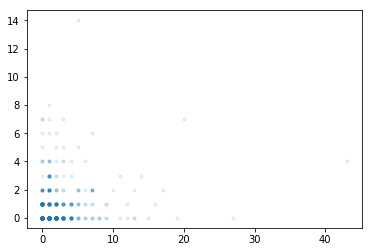

In [174]:
plt.scatter(x, y, marker='.',alpha=0.1)

In [175]:
df = data.sample(frac=1, random_state=258).reset_index(drop=True)
train, validate, test = np.split(df.sample(frac=1), [int(0.5*len(df)), int(0.75*len(df))])
full = pd.concat([train, validate])

$$\text{rating} \simeq \alpha + \beta_1\times\text{"HelpfulnessFraction"} + \lambda\beta_1^2$$